# Ejecución del WPS

Recordemos que:
<div align="center">
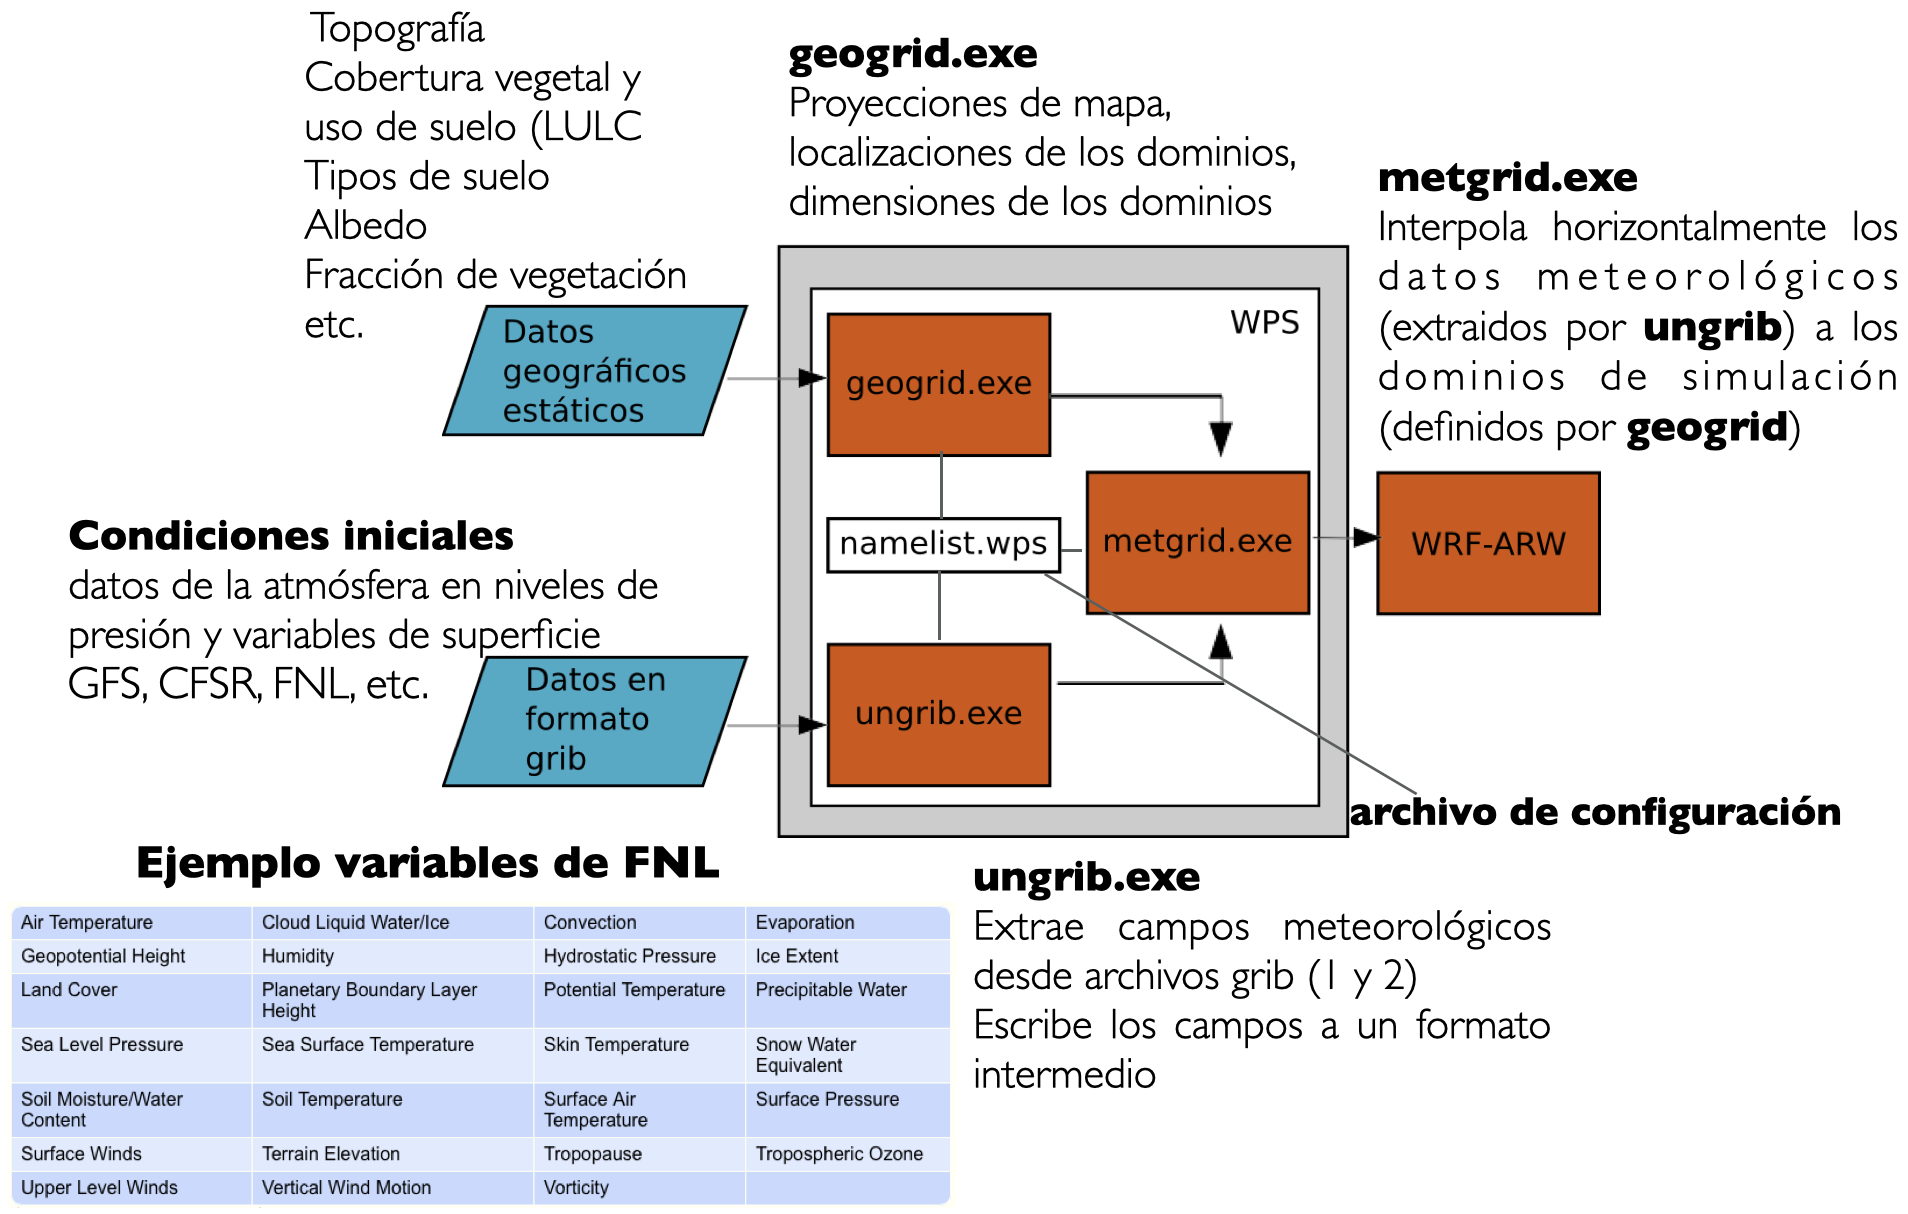
</div>

---

### Datos estáticos para GEOGRID.EXE
2. Bajar los datos estáticos de la página de usuarios del WRF: https://www2.mmm.ucar.edu/wrf/users/
    * Download -> Static Data Downloads
    * Los datos estáticos son campos obligatorios necesarios para ejecutar WPS y WRF. En la pagina de usuario puedes encontrar dos archivos compimidos *tar*: uno con las resoluciones finas (recomendado) y otro con las resoluciones más gruesas
        * El archivo de resolución fina sin comprimir pesa 29 GB y comprimidos 2.6 GB
    * Sólo es necesario bajarlos una sólo vez, y una vez hecho esto se emplean dentro del archivo *namelist.wps*
    * Para nuestro caso estos datos ya se bajaron y están disponibles en la siguiente ruta: 
    * **/home/cca/i.5010/tmp/datos_geograficos/WPS_GEOG** 
        * **Nota:** Cuando sea necesario bajarlos se pueden emplear los siguientes comandos
        * wget https://www2.mmm.ucar.edu/wrf/src/wps_files/geog_high_res_mandatory.tar.gz **OJO: esta liga puede cambiar, actualizar si es necesario**
        * *tar -xvf geog_high_res_mandatory.tar.gz*

---

### Datos dinámicos para UNGRIB.EXE
3. Bajar datos atmosféricos en formato GRIB desde NCAR (National Center for Atmospheric Research)
    * https://rda.ucar.edu

<div align="center">
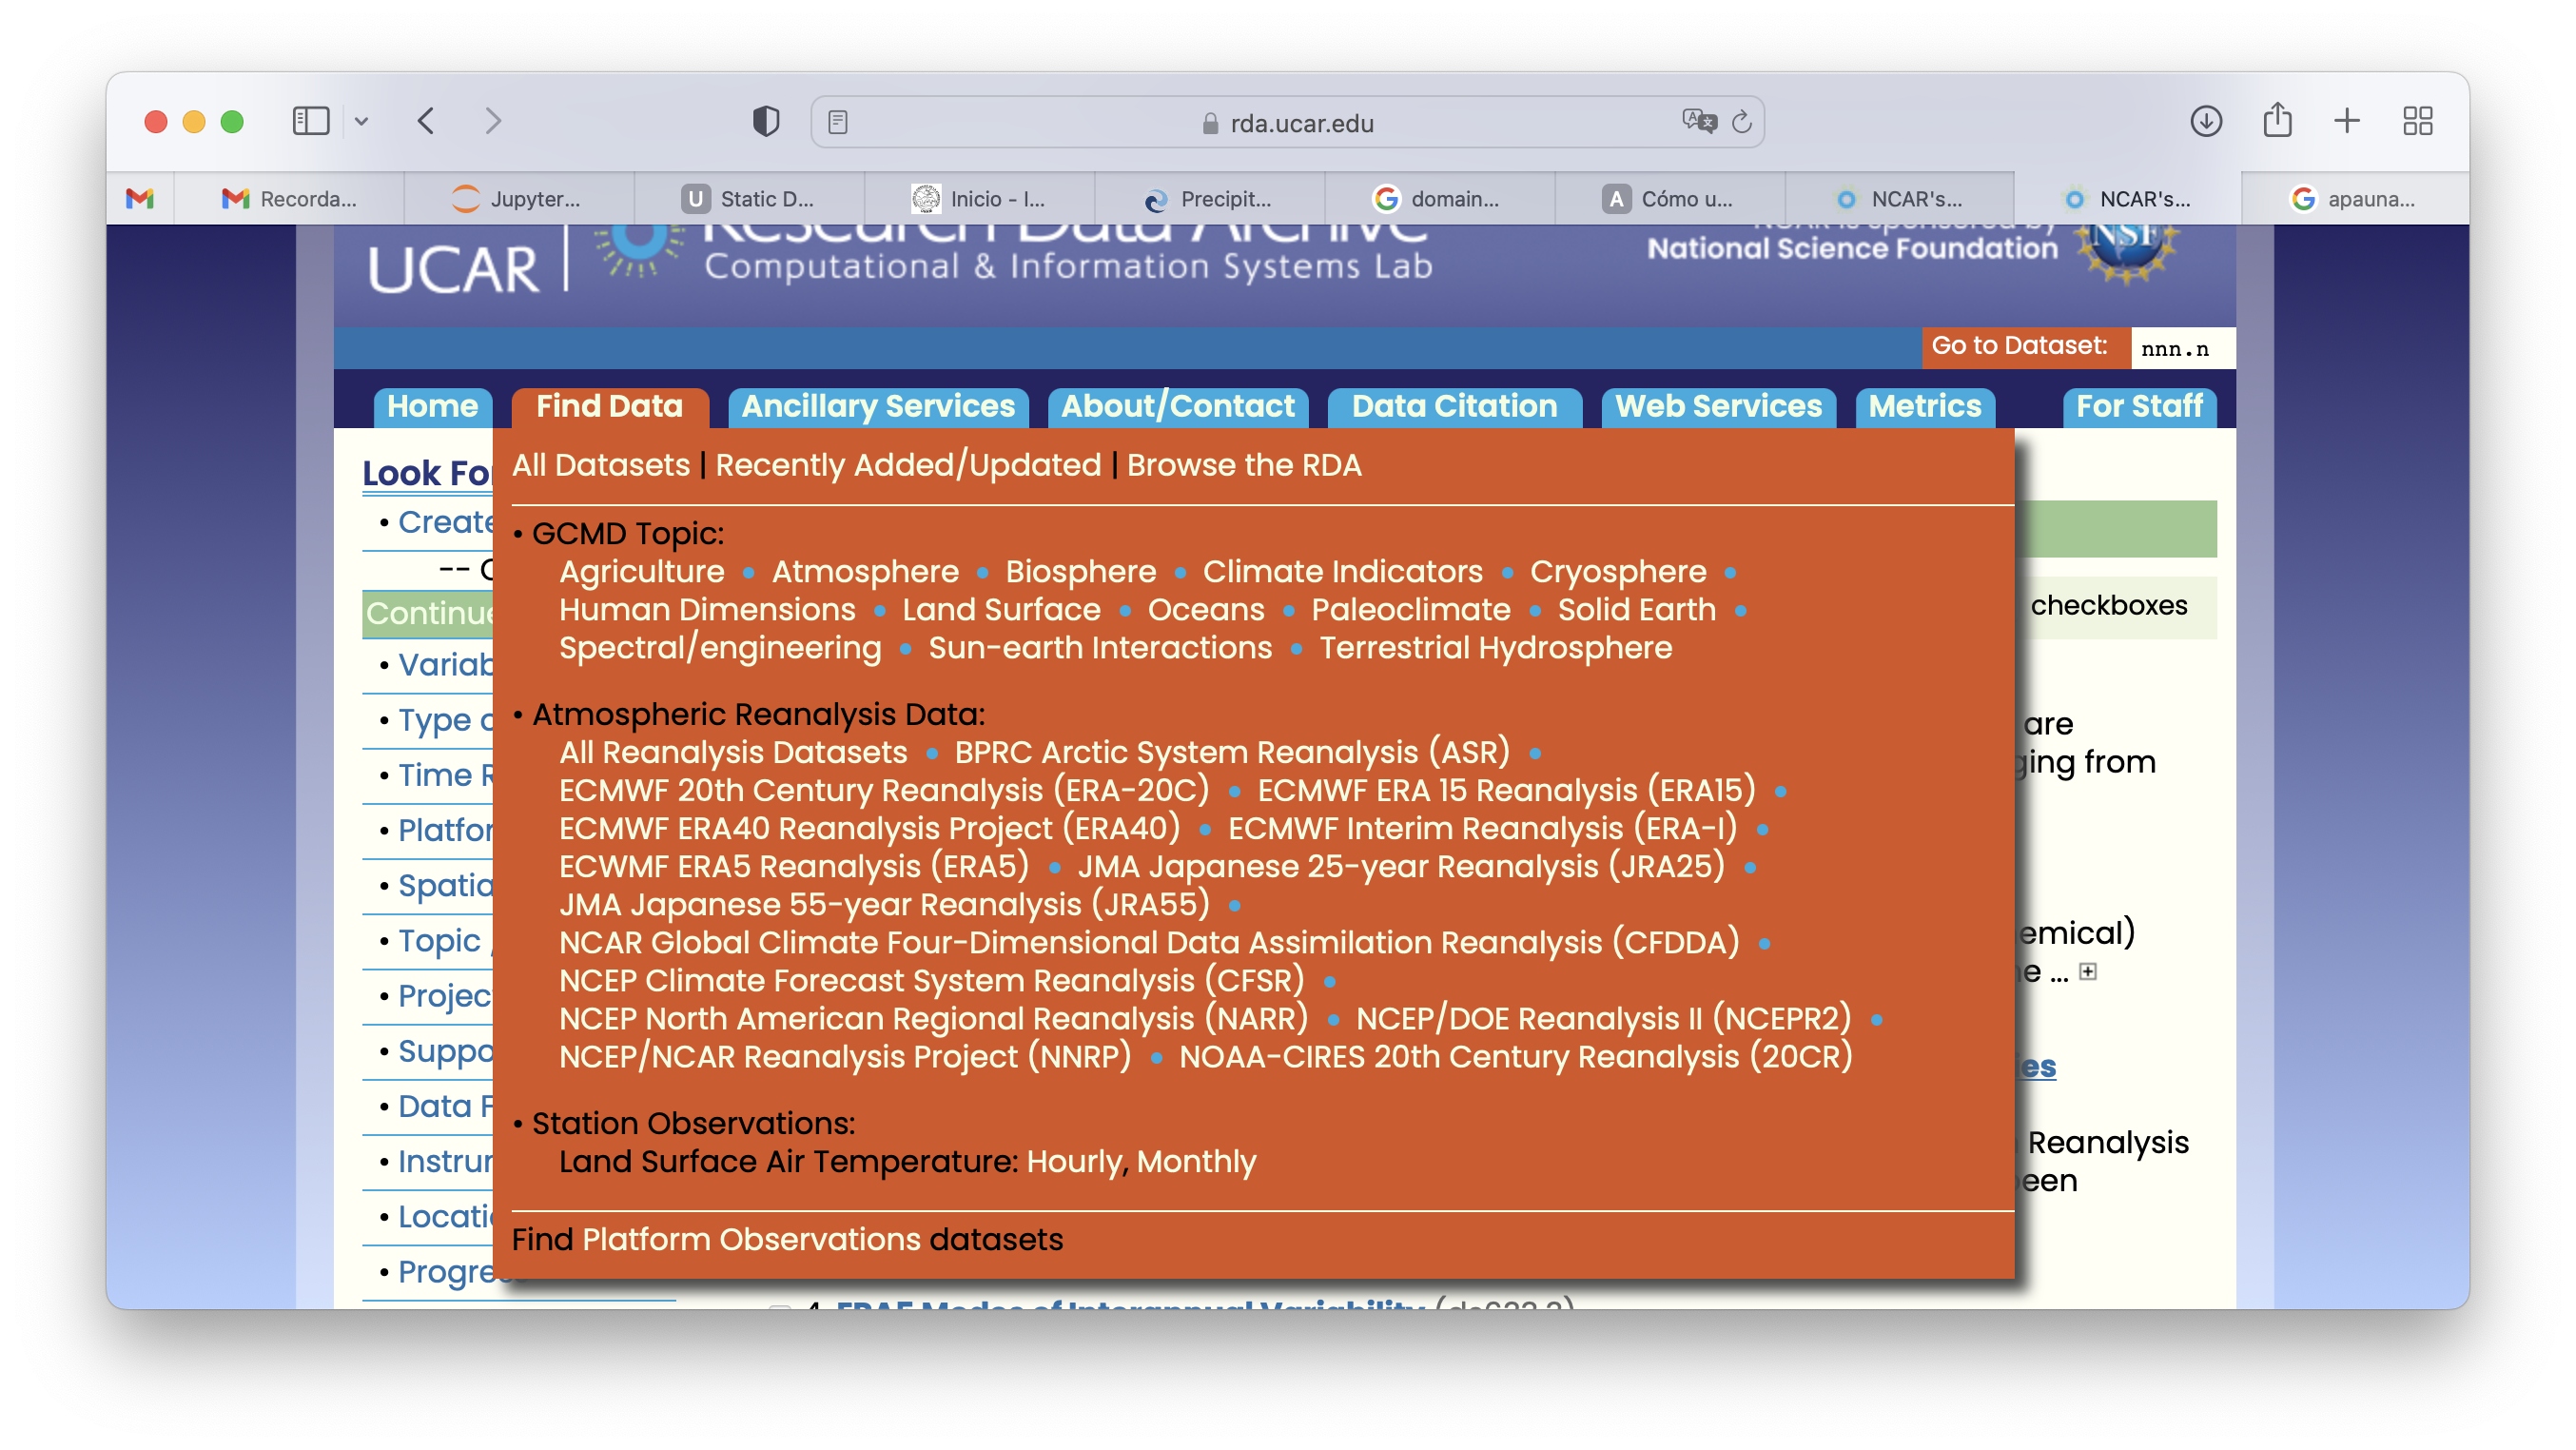
</div>

**Fuente: https://www2.mmm.ucar.edu/wrf/users/download/free_data.html**
<div align="center">
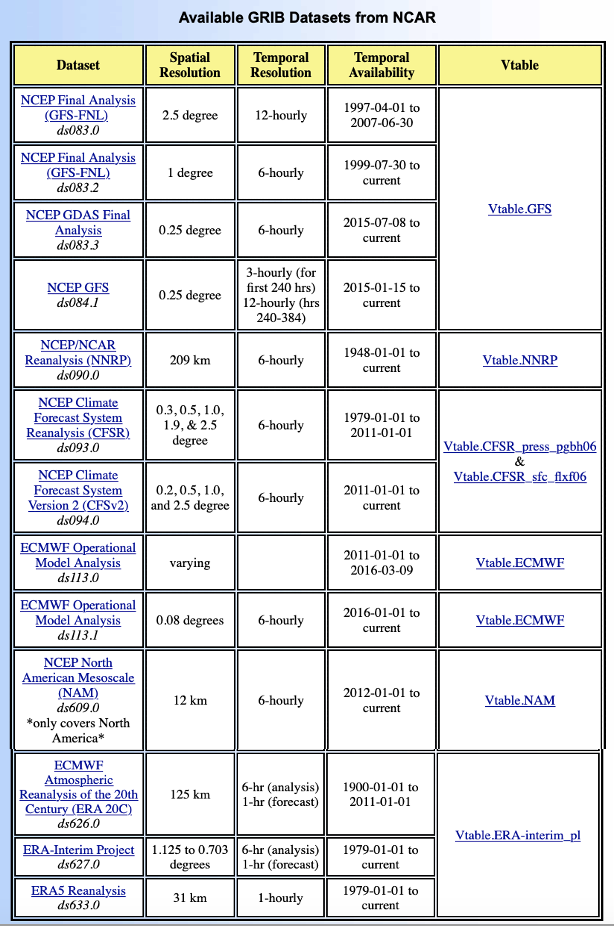
</div>

<p> </p>

### Procedimiento muy general para bajar datos CFSR (Climate Forecast System Reanalysis) V2
<div align="center">
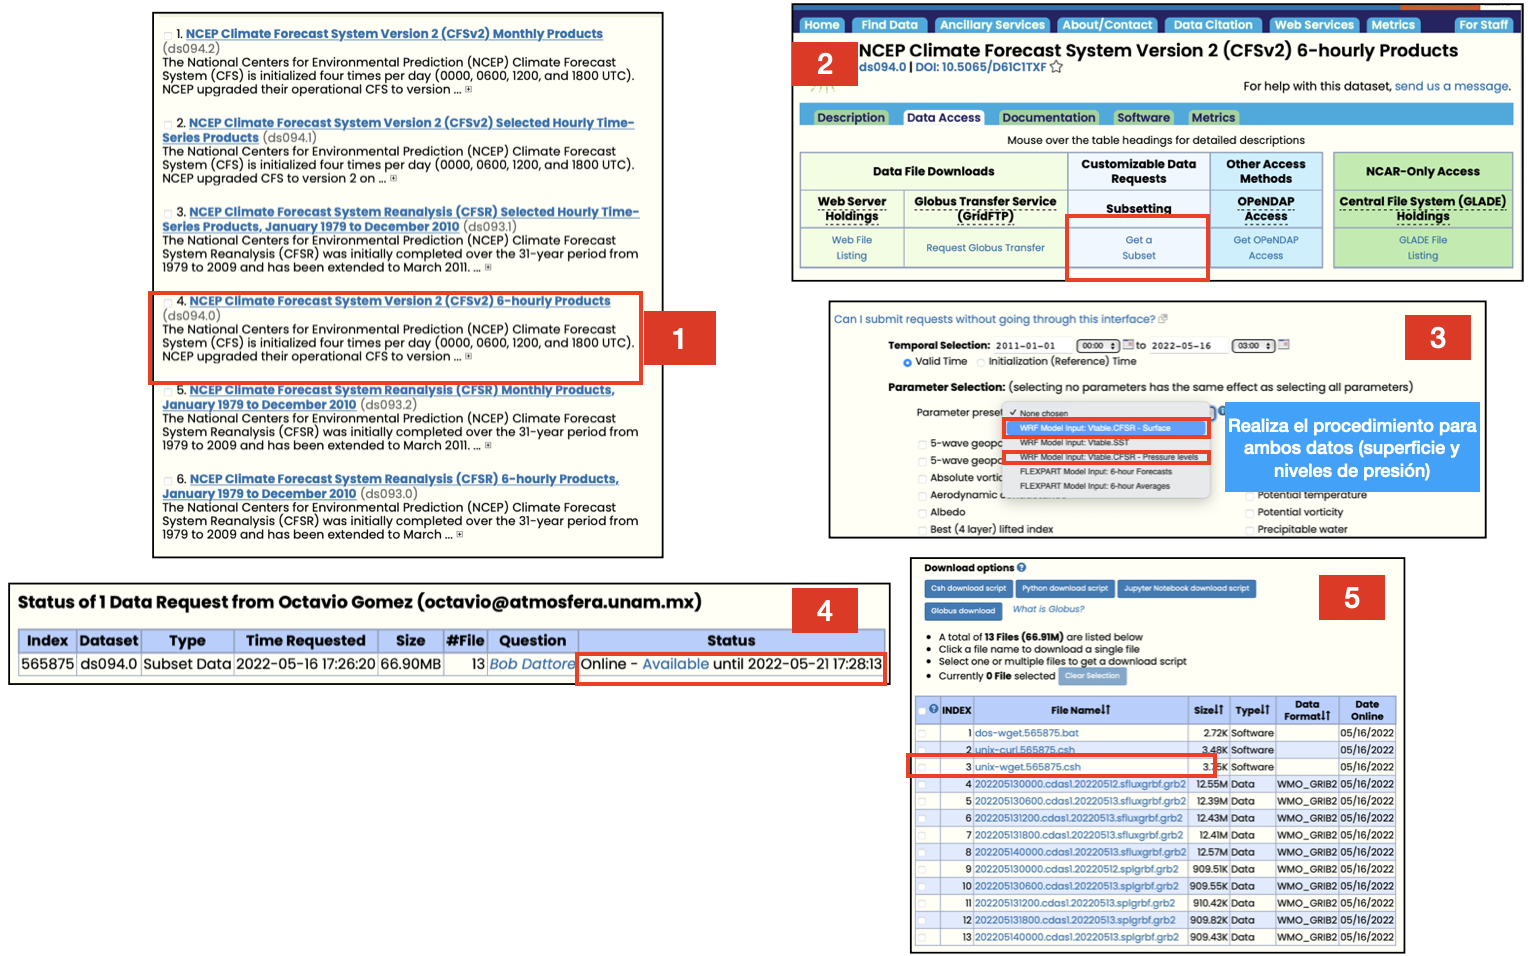
</div>

1. Registrarse en la página: https://rda.ucar.edu 
2. Bajar datos CFSR -> **NCEP Climate Forecast System Version 2 (CFSv2) 6-hourly Products**
3. Ir a Data Access -> seleccionar y descargar los datos para el día **13 de mayo de 2022 a las 00 horas** hasta el día **14 de mayo de 2022 a las 00 horas** (Nota: es necesario saber que los datos están en UTC)
4. Crear una carpeta en tu perfil sobre la carpeta *tmp* que se llame *datos_dinamicos*, en mi caso quedó así:
   * */home/cca/i.5010/tmp/datos_dinamicos*
5. Copiar el script a la carpeta *datos_dinamicos*
6. Editar el archivo **unix-wget.565875.csh** y modificar la instrucción de password cambiando las xxxxxx por la contraseña de registro. Guardar los cambios hechos
    * *set passwd = 'xxxxxx'*
7. Cambiar los permisos para poder ejecutar el script: 
    * *chmod 744 unix-wget.565875.csh*
8. Ejecutar el script y los datos empezarán a descargarse 
    * **./unix-wget.565875.csh**
    
**Nota: raliza la descarga de datos de *superficie* y de los *niveles de presión*. Descarga los datos de superficie dentro de  *datos_dinamicos* en una carpeta nombrada *srf_flx* y los datos de presión en una carpeta nombrada *press***   

<div align="center">
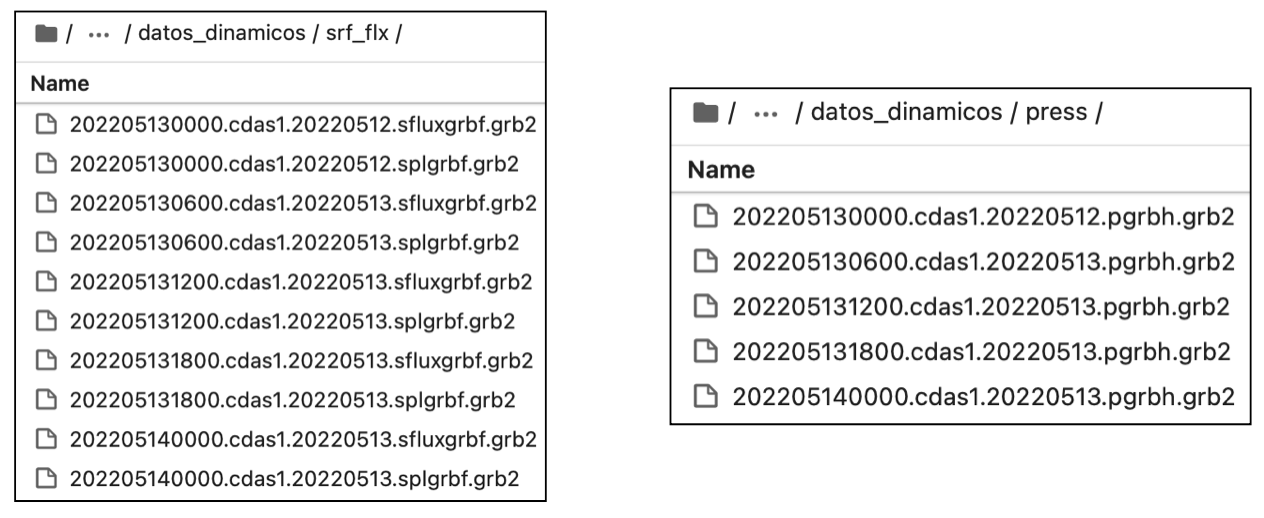
</div>

---

## Modificando el archivo de configuración **namelist.wps** para ejecutar **geogrid.exe**
<div align="center">
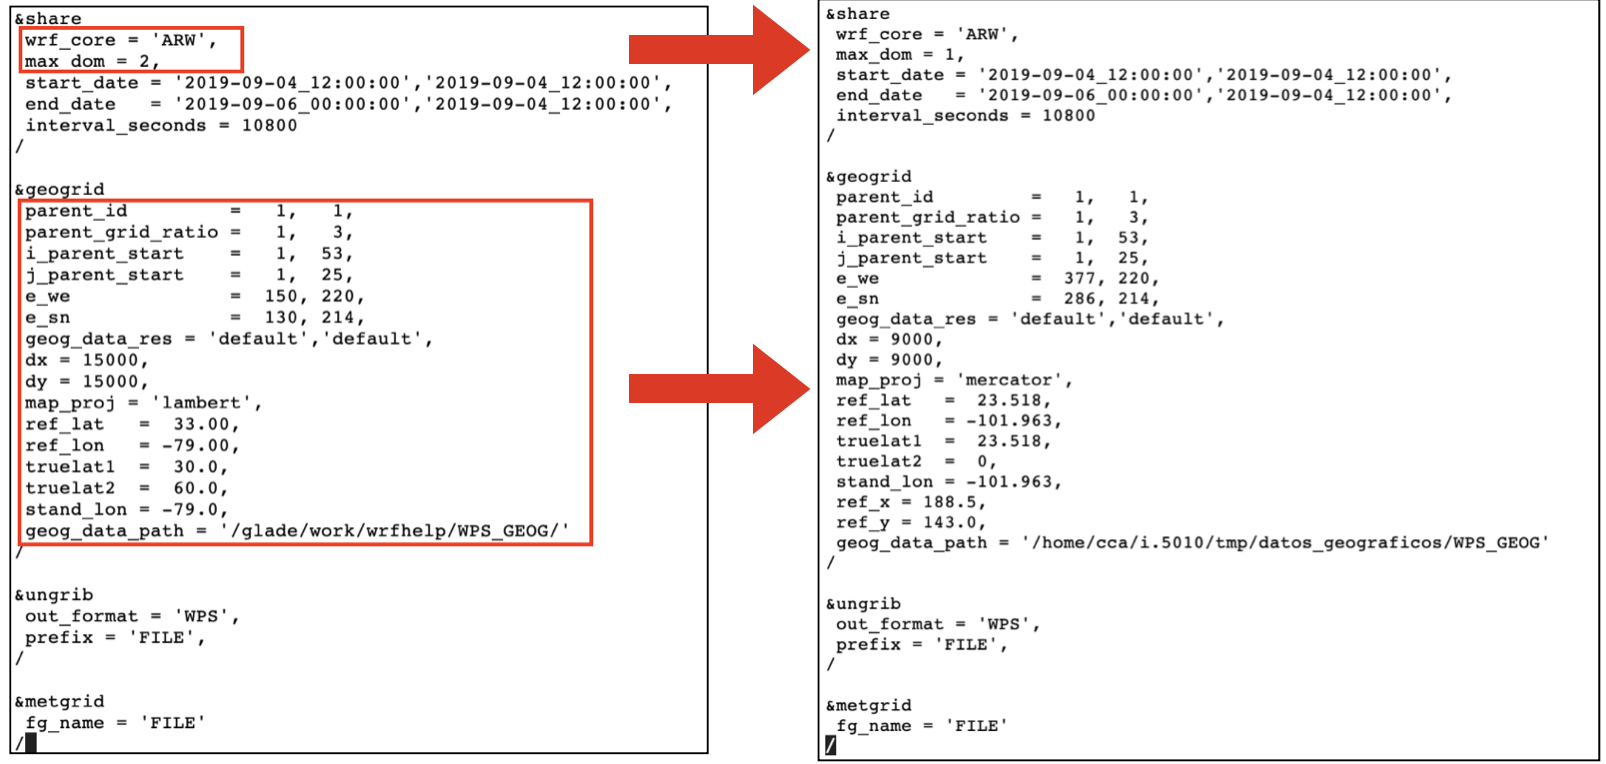
</div>

#### La sección de geogrid nos sirve para definir:
  * **La proyección cartográfica** (se pueden definir entre Lambert conformal, Mercator, Polar estereográfica y Latitud-Longitud. Además, todos lo dominios deben tener la misma proyección) 
  * La ubicación geográfica de los dominios 
  * Las dimensiones de los dominios
  * La resolución horizontal de los dominios
  
Recuerda que con *geogrid.exe* se dan los valores para los campos estáticos (invariantes con el tiempo) en cada celda/punto de malla del dominio. Además, se interpola horizontalmente los datos terrestres (altura topográfica, categoría de cobertura de suelo, tipo de suelo, fracción de vegetación, albedo mensual, etc.) de los datos globales.

En el archivo *namelist.wps* se emplean los siguientes parámetros para definir la proyección:
- **map_proj**: ‘lambert’, ‘mercator’, ‘polar’ o ‘lat-lon’ 
- **truelat1**: primera latitud real
- **truelat2**: segunda latitud real (solo para Labert conformal)
- **stand_lon**: meridiano paralelo al eje *y*

Además, se emplean los siguientes parámetros para definir las dimensiones y ubicación del dominio:
- **ref_lat**, **ref_lon**: es la locación de un sitio conocido en el dominio (por defecto, es el punto central del dominio)
- **dx, dy**: es la distancia de la celda. Resolución en metros para*Lambet, Mercator y estereográfico polar* y para *lat-lon* en grados  
- **e_we**: número de puntos de malla en dirección oeste-este 
- **e_sn**: número de puntos de malla en dirección sur-norte

<div>
<img src="https://tlaloc.atmosfera.unam.mx/images/dominios_arw.png"  width="50%"/>
</div>

---

1. Una vez realizados los cambios marcados en la imagen de arriba del archivo *namelist.wps* dentro de la sección *&share* y *&geogrid*, ejecuta el script para correr *geogrid.exe*

**El contenido del script *ejecutar_geogrid.pbs* es:**
<div>
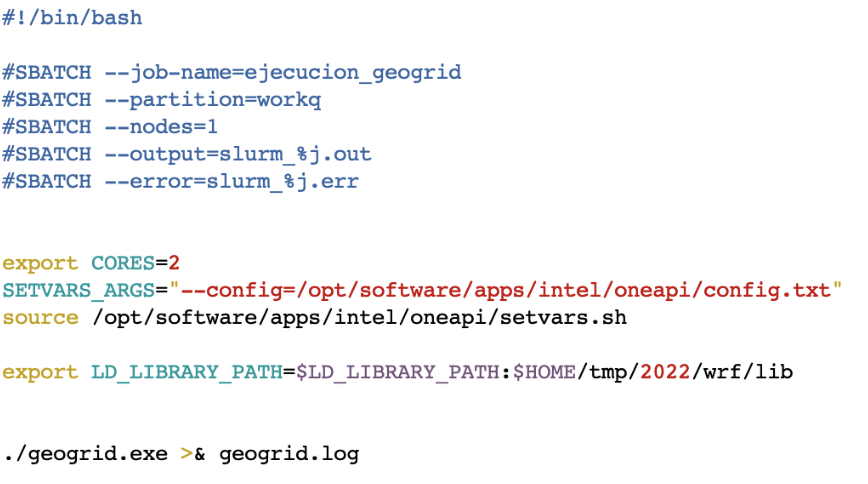
</div>

**En una terminal realiza lo siguiente:**

<div>
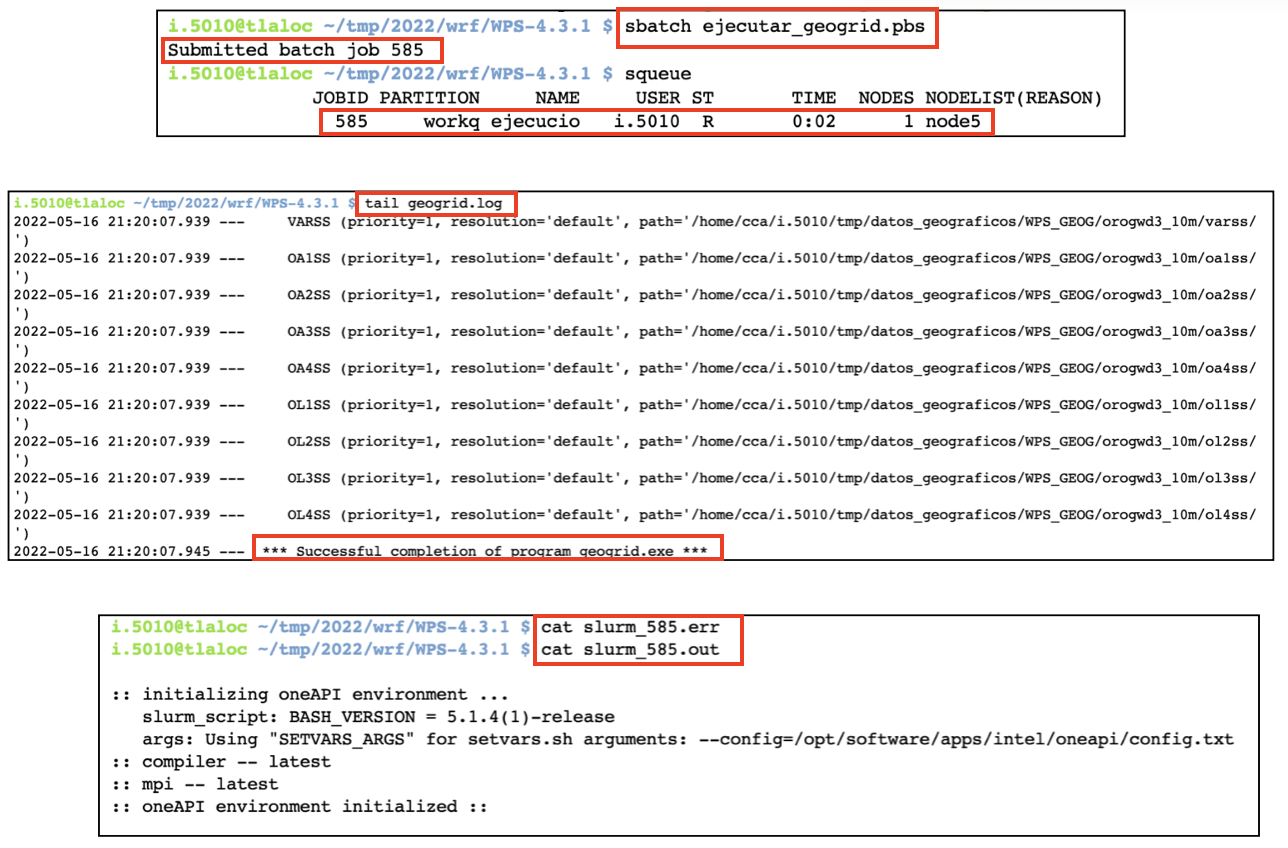
</div>

* Los archivos creados son: **geo_em.d01.nc, geogrid.log, slurm_585.err, slurm_585.out**

---

#### NOTA: en una terminal cargar las variables para el uso de compiladores y netCDF 
~~~bash
SETVARS_ARGS="--config=/opt/software/apps/intel/oneapi/config.txt"

source /opt/software/apps/intel/oneapi/setvars.sh 

export NETCDF=$HOME/tmp/2022/wrf

export PATH=$HOME/tmp/2022/wrf/bin:$PATH
~~~ 
* Ejecutar el siguiente comando para ver la cabecera del archivo netCDF
    * ncdump -h geo_em.d01.nc